<a href="https://colab.research.google.com/github/jhanvi0905/WineVariety/blob/master/WineVariety.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [2]:
!unzip "/content/1442_8172_bundle_archive.zip"

Archive:  /content/1442_8172_bundle_archive.zip
  inflating: winemag-data-130k-v2.csv  
  inflating: winemag-data-130k-v2.json  
  inflating: winemag-data_first150k.csv  


In [3]:
import nltk
nltk.download('stopwords')
nltk.download('punkt')
!pip install seaborn

[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Unzipping corpora/stopwords.zip.
[nltk_data] Downloading package punkt to /root/nltk_data...
[nltk_data]   Unzipping tokenizers/punkt.zip.


In [4]:
from pandas import DataFrame
import pandas as pd
import numpy as np
import spacy
import textblob
import re
import seaborn as sns 
import matplotlib.pyplot as plt
from nltk.tokenize.treebank import TreebankWordDetokenizer
from nltk.corpus import stopwords
from nltk import word_tokenize
from sklearn import metrics
from sklearn.model_selection import train_test_split
from sklearn.feature_extraction.text import CountVectorizer, TfidfVectorizer
from sklearn.svm import LinearSVC
from sklearn import preprocessing


/usr/local/lib/python3.6/dist-packages/statsmodels/tools/_testing.py:19: FutureWarning: pandas.util.testing is deprecated. Use the functions in the public API at pandas.testing instead.
  import pandas.util.testing as tm


In [11]:
wdata= pd.read_csv('/content/drive/My Drive/Knight ML Assignment/Data/train.csv')

In [12]:
wdata.head()

,user_name,country,review_title,review_description,designation,points,price,province,region_1,region_2,winery,variety
0,NaN,Australia,Andrew Peace 2007 Peace Family Vineyard Chardo...,"Classic Chardonnay aromas of apple, pear and h...",Peace Family Vineyard,83,10.0,Australia Other,South Eastern Australia,NaN,Andrew Peace,Chardonnay
1,@wawinereport,US,North by Northwest 2014 Red (Columbia Valley (...,This wine is near equal parts Syrah and Merlot...,NaN,89,15.0,Washington,Columbia Valley (WA),Columbia Valley,North by Northwest,Red Blend
2,NaN,Italy,Renato Ratti 2007 Conca (Barolo),Barolo Conca opens with inky dark concentratio...,Conca,94,80.0,Piedmont,Barolo,NaN,Renato Ratti,Nebbiolo
3,@vossroger,France,Domaine l'Ancienne Cure 2010 L'Abbaye White (B...,It's impressive what a small addition of Sauvi...,L'Abbaye,87,22.0,Southwest France,Bergerac Sec,NaN,Domaine l'Ancienne Cure,Bordeaux-style White Blend
4,@vossroger,France,Château du Cèdre 2012 Le Cèdre Vintage Malbec ...,"This ripe, sweet wine is rich and full of drie...",Le Cèdre Vintage,88,33.0,France Other,Vin de Liqueur,NaN,Château du Cèdre,Malbec


38


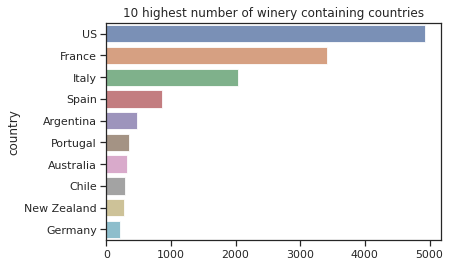

In [13]:
country=wdata['country'].drop_duplicates(keep='first', inplace=False).dropna()
country
print(len(country))
winery = wdata[["country","winery"]].drop_duplicates(keep='first').groupby(by="country").count().sort_values(by="winery")[::-1]
winery=winery[:10]
winery_val=[]
for i in range(10):
  winery_val.append(winery.values[i][0])
winery_val=winery_val[:10]
#print(winery_val)
sns.set(style="ticks")
ax = sns.barplot(x = winery_val, y = winery.index, alpha=0.8)
ax.set_title("10 highest number of winery containing countries")
plt.show()

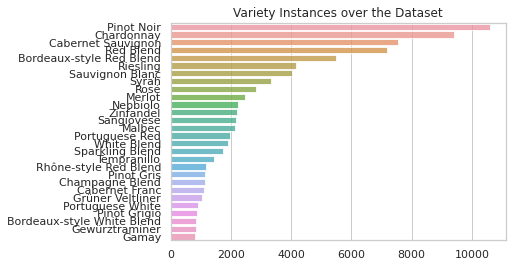

In [14]:
variety = pd.DataFrame(wdata['variety'])
variety=variety['variety'].value_counts()
sns.set(style="whitegrid")
ax = sns.barplot(y = variety.index, x = variety.values, alpha=0.8)
ax.set_title("Variety Instances over the Dataset")
plt.show()

In [ ]:
wdata.describe()

,points,price
count,82657.000000,77088.000000
mean,88.544564,36.922232
std,3.099649,43.698346
min,80.000000,4.000000
25%,86.000000,18.000000
50%,88.000000,27.000000
75%,91.000000,45.000000
max,100.000000,3300.000000


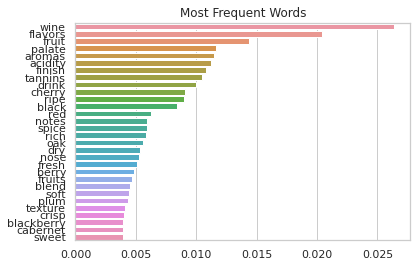

In [16]:
data = wdata.groupby("variety").filter(lambda x: len(x) >100)
sns.set(style="whitegrid")
stopwords = set(stopwords.words('english'))
detokenizer = TreebankWordDetokenizer()
def clean_description(desc):
    desc = word_tokenize(desc.lower())
    desc = [token for token in desc if token not in stopwords and token.isalpha()]
    return detokenizer.detokenize(desc)
data["cleaned_description"] = wdata["review_description"].apply(clean_description)
word_occurrence = data["cleaned_description"].str.split(expand=True).stack().value_counts()
total_words = sum(word_occurrence)
top_words = word_occurrence[:30]/total_words
ax = sns.barplot(x = top_words.values, y = top_words.index)
ax.set_title("Most Frequent Words")
plt.show()

In [18]:
years=[]  
for value in wdata['review_title']:
    regexresult = re.search(r'19\d{2}|20\d{2}', value)
    if regexresult:
        years.append(regexresult.group())
    else: years.append(None)
wdata['Vintage'] = years
wdata['Vintage'].describe()

count     80129
unique       38
top        2012
freq      10379
Name: Vintage, dtype: object

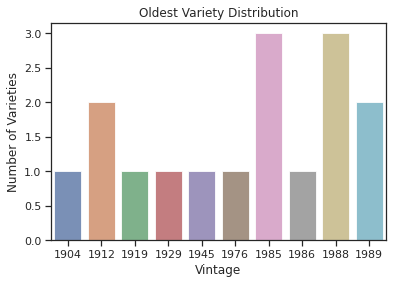

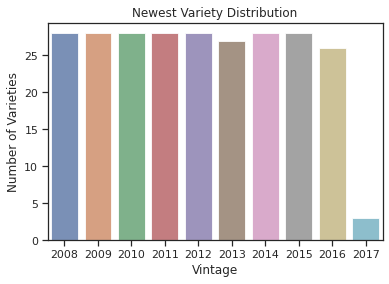

In [ ]:
grape_year=wdata[["variety","Vintage"]]
grape_year=grape_year.dropna().drop_duplicates()
grape_year=grape_year.reset_index(drop=True)
grape_year=pd.DataFrame(grape_year.groupby(by="Vintage").count().sort_values(by="Vintage"))
grape_val=[]
for i in range(len(grape_year)):
  grape_val.append(grape_year.values[i][0])
grape_old=grape_year[:10]
grape_old_val=grape_val[:10]
sns.set(style="ticks")
ax = sns.barplot(x = grape_old.index, y =grape_old_val, alpha=0.8)
ax.set_title("Oldest Variety Distribution")
plt.ylabel("Number of Varieties")
plt.show()
grape_new=grape_year[-10:]
grape_new_val=grape_val[-10:]
sns.set(style="ticks")
ax = sns.barplot(x = grape_new.index, y =grape_new_val, alpha=0.8)
ax.set_title("Newest Variety Distribution")
plt.ylabel("Number of Varieties")
plt.show()

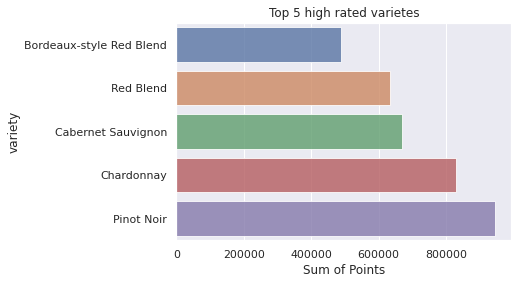

In [ ]:
rate=wdata[["variety","points"]]
top_rated=pd.DataFrame(rate.groupby("variety")['points'].sum().sort_values())[-5:]
rate_val=[]
for i in range(len(top_rated)):
  rate_val.append(top_rated.values[i][0])
sns.set(style="darkgrid")
ax=sns.barplot(y=top_rated.index, x=rate_val, alpha=0.8)
ax.set_title("Top 5 high rated varietes")
ax.set_xlabel("Sum of Points")
plt.show()


In [ ]:
variety=DataFrame(actual_data.variety.value_counts())
varietyl=list(variety.index[variety['variety']>1000])
actual_dat=actual_data[actual_data['variety'].isin(varietyl)]
actual_dat.variety.value_counts()

Pinot Noir                  10587
Chardonnay                   9403
Cabernet Sauvignon           7552
Red Blend                    7166
Bordeaux-style Red Blend     5497
Riesling                     4148
Sauvignon Blanc              4011
Syrah                        3316
Rosé                         2831
Merlot                       2471
Nebbiolo                     2242
Zinfandel                    2209
Sangiovese                   2165
Malbec                       2119
Portuguese Red               1969
White Blend                  1896
Sparkling Blend              1739
Tempranillo                  1448
Rhône-style Red Blend        1182
Pinot Gris                   1148
Champagne Blend              1133
Cabernet Franc               1095
Grüner Veltliner             1055
Name: variety, dtype: int64

In [19]:
actual_data= wdata.drop(columns=['user_name','country','points','price','Vintage' ,'review_title', 'review_description', 'designation', 'province', 'region_1','region_2','winery']).dropna().reset_index(drop=True)
actual_data['description']=data['cleaned_description']
actual_data

,variety,description
0,Chardonnay,classic chardonnay aromas apple pear hay lead ...
1,Red Blend,wine near equal parts syrah merlot balance cab...
2,Nebbiolo,barolo conca opens inky dark concentration soo...
3,Bordeaux-style White Blend,impressive small addition sauvignon gris musca...
4,Malbec,ripe sweet wine rich full dried fresh fruit fl...
...,...,...
82652,Tempranillo,hot earth baked cherry mild vanilla aromas com...
82653,Cabernet Sauvignon,pungent notes turmeric dried flower hit nose f...
82654,Gamay,wine lively fruity weight structure well keepi...
82655,Bordeaux-style Red Blend,impressive wine already shows signs potential ...


In [29]:
from keras.preprocessing.text import Tokenizer
from keras.preprocessing.sequence import pad_sequences
from keras.models import Sequential
from keras.layers import Dense, Flatten, LSTM, Conv1D, MaxPooling1D, Dropout, Activation, Bidirectional, TimeDistributed, Input
from keras import Model
from keras.layers.embeddings import Embedding
from sklearn.model_selection import train_test_split

Using TensorFlow backend.


In [26]:
X_train, X_test, Y_train, Y_test= train_test_split(actual_data['description'], actual_data['variety'], test_size=0.25)

In [27]:
print(len(X_train))
print(len(X_test))

61992
20665


In [30]:
tokenizer = Tokenizer()
tokenizer.fit_on_texts(X_train)
vocab_size = len(tokenizer.word_index) + 1
print(vocab_size)

22313


In [32]:
train_sequences = tokenizer.texts_to_sequences(X_train)
train_data = pad_sequences(train_sequences, maxlen=25, padding='post')

In [33]:
train_data.shape

(61992, 25)

In [35]:
test_sequences = tokenizer.texts_to_sequences(X_test)
test_data = pad_sequences(test_sequences, maxlen=25, padding='post')

In [36]:
test_data.shape

(20665, 25)

In [34]:
from keras.utils import to_categorical
Label=preprocessing.LabelEncoder()
Y_train=Label.fit_transform(Y_train)
Y_test=Label.transform(Y_test)
Y_train.shape

(61992,)

In [38]:
from gensim.models import Word2Vec
actual_data['tokenized'] = actual_data.apply(lambda row : nltk.word_tokenize(row['description']), axis=1)

In [39]:
actual_data.head()

,variety,description,tokenized
0,Chardonnay,classic chardonnay aromas apple pear hay lead ...,"[classic, chardonnay, aromas, apple, pear, hay..."
1,Red Blend,wine near equal parts syrah merlot balance cab...,"[wine, near, equal, parts, syrah, merlot, bala..."
2,Nebbiolo,barolo conca opens inky dark concentration soo...,"[barolo, conca, opens, inky, dark, concentrati..."
3,Bordeaux-style White Blend,impressive small addition sauvignon gris musca...,"[impressive, small, addition, sauvignon, gris,..."
4,Malbec,ripe sweet wine rich full dried fresh fruit fl...,"[ripe, sweet, wine, rich, full, dried, fresh, ..."


In [40]:
model_w2v = Word2Vec(actual_data['tokenized'], size=300, min_count=6)

In [41]:
model_w2v['wine']
model_w2v.wv.save_word2vec_format("model_w2v_300.txt", binary=False)

/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:1: DeprecationWarning: Call to deprecated `__getitem__` (Method will be removed in 4.0.0, use self.wv.__getitem__() instead).
  """Entry point for launching an IPython kernel.
/usr/local/lib/python3.6/dist-packages/smart_open/smart_open_lib.py:253: UserWarning: This function is deprecated, use smart_open.open instead. See the migration notes for details: https://github.com/RaRe-Technologies/smart_open/blob/master/README.rst#migrating-to-the-new-open-function
  'See the migration notes for details: %s' % _MIGRATION_NOTES_URL


In [43]:
embeddings_index = dict()
f = open('model_w2v_300.txt')
for line in f:
    values = line.split()
    word = values[0]
    coefs = np.asarray(values[1:], dtype='float32')
    embeddings_index[word] = coefs
f.close()
print('Loaded %s word vectors.' % len(embeddings_index))

Loaded 8806 word vectors.


In [44]:
from numpy import zeros
embedding_matrix = zeros((vocab_size, 300))
for word, i in tokenizer.word_index.items():
 embedding_vector =embeddings_index.get(word)
 if embedding_vector is not None:
  embedding_matrix[i] = embedding_vector

In [45]:
max_len=25
input = Input(shape=(max_len,))
model = Embedding(vocab_size,300,weights=[embedding_matrix],input_length=max_len)(input)
model =  Bidirectional (LSTM (100,return_sequences=True,dropout=0.50),merge_mode='concat')(model)
model = TimeDistributed(Dense(100,activation='relu'))(model)
model = Flatten()(model)
model = Dense(100,activation='relu')(model)
output = Dense(28,activation='softmax')(model)
model = Model(input,output)
model.compile(loss='sparse_categorical_crossentropy',optimizer='adam', metrics=['accuracy'])
model.summary()

Model: "model_1"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
input_1 (InputLayer)         (None, 25)                0         
_________________________________________________________________
embedding_1 (Embedding)      (None, 25, 300)           6693900   
_________________________________________________________________
bidirectional_1 (Bidirection (None, 25, 200)           320800    
_________________________________________________________________
time_distributed_1 (TimeDist (None, 25, 100)           20100     
_________________________________________________________________
flatten_1 (Flatten)          (None, 2500)              0         
_________________________________________________________________
dense_2 (Dense)              (None, 100)               250100    
_________________________________________________________________
dense_3 (Dense)              (None, 28)                2828

In [46]:
model.fit(train_data, Y_train, validation_split=0.2, epochs=5)

/usr/local/lib/python3.6/dist-packages/tensorflow/python/framework/indexed_slices.py:434: UserWarning: Converting sparse IndexedSlices to a dense Tensor of unknown shape. This may consume a large amount of memory.
  "Converting sparse IndexedSlices to a dense Tensor of unknown shape. "


Train on 49593 samples, validate on 12399 samples
Epoch 1/5
49593/49593 [==============================] - 254s 5ms/step - loss: 1.6192 - accuracy: 0.4928 - val_loss: 1.2514 - val_accuracy: 0.5997
Epoch 2/5
49593/49593 [==============================] - 257s 5ms/step - loss: 1.1699 - accuracy: 0.6239 - val_loss: 1.1247 - val_accuracy: 0.6446
Epoch 3/5
49593/49593 [==============================] - 266s 5ms/step - loss: 0.9563 - accuracy: 0.6918 - val_loss: 1.1305 - val_accuracy: 0.6534
Epoch 4/5
49593/49593 [==============================] - 265s 5ms/step - loss: 0.7816 - accuracy: 0.7454 - val_loss: 1.2205 - val_accuracy: 0.6491
Epoch 5/5
49593/49593 [==============================] - 261s 5ms/step - loss: 0.6369 - accuracy: 0.7901 - val_loss: 1.3078 - val_accuracy: 0.6414


In [51]:
model.fit(train_data, Y_train, validation_split=0.2, epochs=5)

Train on 49593 samples, validate on 12399 samples
Epoch 1/5
49593/49593 [==============================] - 255s 5ms/step - loss: 0.5179 - accuracy: 0.8273 - val_loss: 1.4401 - val_accuracy: 0.6442
Epoch 2/5
49593/49593 [==============================] - 249s 5ms/step - loss: 0.4306 - accuracy: 0.8537 - val_loss: 1.6553 - val_accuracy: 0.6380
Epoch 3/5
49593/49593 [==============================] - 250s 5ms/step - loss: 0.3606 - accuracy: 0.8778 - val_loss: 1.8320 - val_accuracy: 0.6317
Epoch 4/5
49593/49593 [==============================] - 248s 5ms/step - loss: 0.3064 - accuracy: 0.8945 - val_loss: 2.0025 - val_accuracy: 0.6350
Epoch 5/5
49593/49593 [==============================] - 248s 5ms/step - loss: 0.2631 - accuracy: 0.9097 - val_loss: 2.1986 - val_accuracy: 0.6298


In [ ]:
model.save("/content/drive/My Drive/Knight ML Assignment/prediction_wine_variety.h5")

In [ ]:
zackthoutt Kaggle

In [ ]:
from keras.models import load_model
model=model.load('prediction_wine_variety.h5')

In [48]:
Y_pred = model.predict(test_data)
y_pred = np.array([np.argmax(pred) for pred in Y_pred])

In [49]:
from sklearn.metrics import classification_report
print(classification_report(Y_test, y_pred))

              precision    recall  f1-score   support

           0       0.64      0.66      0.65      1346
           1       0.63      0.41      0.50       217
           2       0.55      0.29      0.38       266
           3       0.61      0.60      0.61      1929
           4       0.60      0.62      0.61       293
           5       0.72      0.84      0.77      2341
           6       0.78      0.39      0.52       221
           7       0.82      0.50      0.62       222
           8       0.60      0.67      0.64       261
           9       0.52      0.47      0.50       539
          10       0.45      0.42      0.44       613
          11       0.66      0.71      0.68       537
          12       0.53      0.57      0.55       212
          13       0.56      0.44      0.49       303
          14       0.67      0.81      0.73      2682
          15       0.65      0.57      0.61       502
          16       0.76      0.47      0.58       235
          17       0.62    

In [58]:
result=DataFrame()
result['description']=X_test
result['variety']=list(Label.inverse_transform(Y_test))
result['predicted_variety']=list(Label.inverse_transform(y_pred))
result.head()

,description,variety,predicted_variety
27775,aromas toasted oak coffee scorched earth lead ...,Red Blend,Red Blend
32104,flavors wine hearty bell pepper black pepper g...,Cabernet Sauvignon,Rhône-style Red Blend
5256,blend petit verdot sangiovese merlot shows str...,Red Blend,Red Blend
8623,style usually big bold moment wine though dens...,Merlot,Merlot
32277,showing mature notes age four years mellow tex...,Pinot Noir,Pinot Noir
